While playing with my son's toy clock I got to thinking about the relative angles between the minute and hour hands. On the toy clock the hands move independently of each other so you can make any configuration desired. On a real clock, of course, the relative position is specified by the time. 

For this analysis, let's look at the relative position of the hands over a 12-hour period to see if we see any patterns.

We start by importing the required libraries.

In [1]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Our goal is to determine the relative positions of the clock hour and minute hands at any given time. We will represent all times in seconds for simplicity.

First we need a function to calculate the position the hour hand at any given time, given as an angle from the 12 o'clock position. The hour hand moves one revolution (360°) in one hour. In degrees per second, this is:

$\frac{360}{12}\frac{^\circ}{\text{hour}} = \frac{360}{12\cdot60}\frac{^\circ}{\text{minute}} = \frac{360}{12\cdot60\cdot60}\frac{^\circ}{\text{second}}$

We will use this function to return the `angleHour` at any given `time`:

In [2]:
def angle_hour(time):
    '''Returns the angle of the hour hand at a given time
       (in degrees, from 12 o'clock).
    time: <class 'pandas._libs.tslibs.timestamps.Timestamp'>'''    
    hour = time.hour
    minute = time.minute
    second = time.second
    
    seconds = hour*60*60 + minute*60 + second
    angleHour = seconds * 360/12/60/60
    
    return angleHour

Likewise, the minute hand moves one revolution (360°) in one minute. In degrees per second, this is:

$\frac{360}{60}\frac{^\circ}{\text{minute}} = \frac{360}{60\cdot60}\frac{^\circ}{\text{second}}$

In [3]:
def angle_minute(time):
    '''Returns the angle of the minute hand at a given time
       (in degrees, from 12 o'clock).
    time: <class 'pandas._libs.tslibs.timestamps.Timestamp'>'''
    hour = time.hour
    minute = time.minute
    second = time.second
    
    seconds = minute*60 + second
    angleMinute = seconds * 360/60/60
    
    return angleMinute

Finally, we calculate the angle between the two hands:

In [4]:
def angle_bet(angleHour,angleMinute):
    '''Returns the angle between the hour and minute hands
       (in degrees).
    angleHour, angleMinute: <float>'''
    angleBetween = abs(angleHour - angleMinute) 
    angleBetween = min(360 - angleBetween, angleBetween) 

    return angleBetween

We will construct a DataFrame with each row representing one second in a 12-hour span, with columns for the angles we need to calculate.

In [5]:
# create df
dateToday = datetime.datetime.now().date()
index = pd.date_range(dateToday, periods=12*60*60, freq='S')
# index = pd.date_range(dateToday, periods=12*60*60*10, freq='.1S')

columns = ['Time','angleHour','angleMinute','angleBetween']
df = pd.DataFrame(index=index, columns=columns).fillna(0)
df['Time'] = df.index

df['angleHour'] = df.apply(lambda row: angle_hour(row['Time']), 
                           axis=1)
df['angleMinute'] = df.apply(lambda row: angle_minute(row['Time']), 
                             axis=1)
df['angleBetween'] = df.apply(lambda row: angle_bet(row['angleHour'],
                                                    row['angleMinute']), 
                              axis=1)
df.tail()

,Time,angleHour,angleMinute,angleBetween
2019-06-03 11:59:55,2019-06-03 11:59:55,359.958333,359.5,0.458333
2019-06-03 11:59:56,2019-06-03 11:59:56,359.966667,359.6,0.366667
2019-06-03 11:59:57,2019-06-03 11:59:57,359.975000,359.7,0.275000
2019-06-03 11:59:58,2019-06-03 11:59:58,359.983333,359.8,0.183333
2019-06-03 11:59:59,2019-06-03 11:59:59,359.991667,359.9,0.091667


We can test these functions to verify expected behavior. In this example, at 1:30, the hour hand should be halfway between 12 and 3, or 45°. Likewise, the minute hand should be at 180°. 

In [6]:
time = df.iloc[5400,0]
print(time)

angleHour = angle_hour(time)
print('angleHour:    {}°'.format(int(angleHour)))

angleMinute = angle_minute(time)
print('angleMinute:  {}°'.format(int(angleMinute)))

angleBetween = angle_bet(angleHour,angleMinute)
print('angleBetween: {}°'.format(int(angleBetween)))

2019-06-03 01:30:00
angleHour:    45°
angleMinute:  180°
angleBetween: 135°


With our DataFrame created and populated, let's plot the angle between the hands as a function of the time over this 12-hour period.

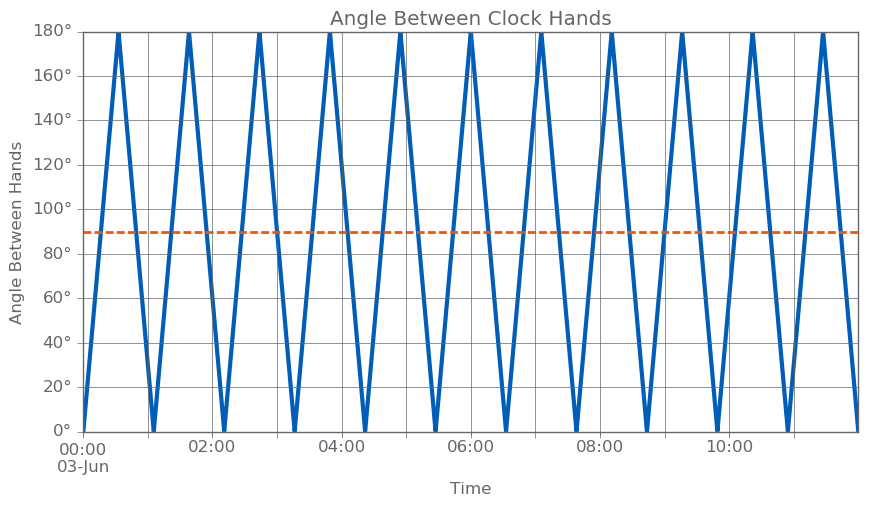

In [7]:
plt.style.use('mag')
ax = df.plot(kind='line', x='Time', y='angleBetween',figsize=(10,5))
ax.get_legend().remove()
plt.ylabel('Angle Between Hands')
plt.title('Angle Between Clock Hands')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, 
                                               loc: "{:,}°".format(int(x))))

plt.xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1]+1, 1*60*60))
ax.plot([ax.get_xlim()[0],ax.get_xlim()[1]],[90,90],'--',linewidth=2)

The first interesting thing to note about this plot is that the hands are 180° apart one less time than they are 0° apart. This is due to the fact that the hour hand completes one revolution during this period and therefore "escapes" one of the 180° apart opportunities. 

Here are the times when then hands overlap (*note that in the below examples there are a few duplicates due to rounding*):

In [8]:
df[df['angleBetween'].round(1)==0]

,Time,angleHour,angleMinute,angleBetween
2019-06-03 00:00:00,2019-06-03 00:00:00,0.000000,0.0,0.000000
2019-06-03 01:05:27,2019-06-03 01:05:27,32.725000,32.7,0.025000
2019-06-03 02:10:54,2019-06-03 02:10:54,65.450000,65.4,0.050000
2019-06-03 02:10:55,2019-06-03 02:10:55,65.458333,65.5,0.041667
2019-06-03 03:16:22,2019-06-03 03:16:22,98.183333,98.2,0.016667
2019-06-03 04:21:49,2019-06-03 04:21:49,130.908333,130.9,0.008333
2019-06-03 05:27:16,2019-06-03 05:27:16,163.633333,163.6,0.033333
2019-06-03 06:32:44,2019-06-03 06:32:44,196.366667,196.4,0.033333
2019-06-03 07:38:11,2019-06-03 07:38:11,229.091667,229.1,0.008333
2019-06-03 08:43:38,2019-06-03 08:43:38,261.816667,261.8,0.016667


Next are the times when the hands are opposite:

In [9]:
df[df['angleBetween'].round(1)==180]

,Time,angleHour,angleMinute,angleBetween
2019-06-03 00:32:44,2019-06-03 00:32:44,16.366667,196.4,179.966667
2019-06-03 01:38:11,2019-06-03 01:38:11,49.091667,229.1,179.991667
2019-06-03 02:43:38,2019-06-03 02:43:38,81.816667,261.8,179.983333
2019-06-03 03:49:05,2019-06-03 03:49:05,114.541667,294.5,179.958333
2019-06-03 03:49:06,2019-06-03 03:49:06,114.550000,294.6,179.950000
2019-06-03 04:54:33,2019-06-03 04:54:33,147.275000,327.3,179.975000
2019-06-03 06:00:00,2019-06-03 06:00:00,180.000000,0.0,180.000000
2019-06-03 07:05:27,2019-06-03 07:05:27,212.725000,32.7,179.975000
2019-06-03 08:10:54,2019-06-03 08:10:54,245.450000,65.4,179.950000
2019-06-03 08:10:55,2019-06-03 08:10:55,245.458333,65.5,179.958333


Here are the times when the hands are 90° apart.

In [10]:
df[df['angleBetween'].round(1)==90]

,Time,angleHour,angleMinute,angleBetween
2019-06-03 00:16:22,2019-06-03 00:16:22,8.183333,98.2,90.016667
2019-06-03 00:49:05,2019-06-03 00:49:05,24.541667,294.5,90.041667
2019-06-03 01:21:49,2019-06-03 01:21:49,40.908333,130.9,89.991667
2019-06-03 01:54:33,2019-06-03 01:54:33,57.275000,327.3,89.975000
2019-06-03 02:27:16,2019-06-03 02:27:16,73.633333,163.6,89.966667
2019-06-03 03:00:00,2019-06-03 03:00:00,90.000000,0.0,90.000000
2019-06-03 03:32:44,2019-06-03 03:32:44,106.366667,196.4,90.033333
2019-06-03 04:05:27,2019-06-03 04:05:27,122.725000,32.7,90.025000
2019-06-03 04:38:11,2019-06-03 04:38:11,139.091667,229.1,90.008333
2019-06-03 05:10:54,2019-06-03 05:10:54,155.450000,65.4,90.050000


And finally, here are the times when the hands are 45° apart:

In [11]:
df[df['angleBetween'].round(1)==45]

,Time,angleHour,angleMinute,angleBetween
2019-06-03 00:08:11,2019-06-03 00:08:11,4.091667,49.1,45.008333
2019-06-03 00:57:16,2019-06-03 00:57:16,28.633333,343.6,45.033333
2019-06-03 01:13:38,2019-06-03 01:13:38,36.816667,81.8,44.983333
2019-06-03 02:02:44,2019-06-03 02:02:44,61.366667,16.4,44.966667
2019-06-03 02:19:05,2019-06-03 02:19:05,69.541667,114.5,44.958333
2019-06-03 02:19:06,2019-06-03 02:19:06,69.550000,114.6,45.050000
2019-06-03 03:08:11,2019-06-03 03:08:11,94.091667,49.1,44.991667
2019-06-03 03:24:33,2019-06-03 03:24:33,102.275000,147.3,45.025000
2019-06-03 04:13:38,2019-06-03 04:13:38,126.816667,81.8,45.016667
2019-06-03 04:30:00,2019-06-03 04:30:00,135.000000,180.0,45.000000


*This post is written in a Jupyter notebook. You can download the [original notebook](). Here are the Python library versions used:*

In [12]:
%load_ext watermark
%watermark -iv

pandas      0.23.4
numpy       1.14.2
matplotlib  3.0.0

